In [1]:
# Python code to unzip the shapefiles
import zipfile
with zipfile.ZipFile('home/Countries.shp.zip', 'r') as zip_country:
    zip_country.extractall('home')
with zipfile.ZipFile('home/Railroads.shp.zip', 'r') as zip_rail:
    zip_rail.extractall('home')
with zipfile.ZipFile('home/mi_airports_shp.zip', 'r') as zip_air:
    zip_air.extractall('home')

FileNotFoundError: [Errno 2] No such file or directory: 'home/Countries.shp.zip'

## Opening a shapefile in Fiona

In [2]:
import fiona

ModuleNotFoundError: No module named 'fiona'

In [13]:
feat_type = None
with fiona.open("home/Railroads.shp") as source:
    print(source.schema)
    print(source.driver)
    f = source.next() #To read the data line by line, .next is used!
    print(f.keys())
    print(f['type'])
    print(f['id'])
    print(f['geometry']['type'])
    feat_type = f['geometry']['type']
    print(f['properties'])
    print(source.bounds) # Gives the bounds of the whole shapefile

{'properties': OrderedDict([('Name', 'str:30'), ('Shape_Leng', 'float:19.11')]), 'geometry': 'LineString'}
ESRI Shapefile
dict_keys(['type', 'id', 'geometry', 'properties'])
Feature
0
LineString
OrderedDict([('Name', 'Santa Fe Railroad'), ('Shape_Leng', 10190.7251123)])
(477520.84001376294, 3762616.4999869894, 487185.5300067639, 3770009.7500098753)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  """


In [14]:
if feat_type == 'LineString':
    print("This is a line feature")
elif feat_type == 'Polygon':
    print("This is a polygon feature")
    

This is a line feature


## Working with shapefile attribute data

In [17]:
# Open Countries shapefile
countries = fiona.open("home/Countries.shp")
# Get first feature
f = countries.next()
# Take a look at first feature's attributes so we can get an idea of the fieldnames
f['properties']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  after removing the cwd from sys.path.


OrderedDict([('ObjectID', 0),
             ('FIPS_CNTRY', 'MG'),
             ('GMI_CNTRY', 'MNG'),
             ('ISO_2DIGIT', 'MN'),
             ('ISO_3DIGIT', 'MNG'),
             ('CNTRY_NAME', 'Mongolia'),
             ('LONG_NAME', 'Mongolia'),
             ('SOVEREIGN', 'Mongolia'),
             ('POP_CNTRY', 2228222),
             ('CURR_TYPE', 'Tughrik'),
             ('CURR_CODE', 'MNT'),
             ('LANDLOCKED', 'Y'),
             ('SQKM', 1557318.38),
             ('SQMI', 601280.5),
             ('COLORMAP', 7)])

In [18]:
# Loop through all countries (features) in the shapefile
for country in countries:
    # Include Country's name and population in printout)
    print(country['properties']['CNTRY_NAME'] + ' has a population of ' + str(country['properties']['POP_CNTRY']))

Mongolia has a population of 2228222
Pitcairn Is. has a population of 56
American Samoa has a population of 53000
Cook Is. has a population of 17000
French Polynesia has a population of 217000
Jarvis I. has a population of -99999
Niue has a population of 2000
Samoa has a population of 159000
Tokelau has a population of 1600
Tonga has a population of 98000
Wallis & Futuna has a population of 14000
Falkland Is. has a population of 2136
South Georgia & the South Sandwich Is. has a population of -99999
St. Helena has a population of 6782
Argentina has a population of 33796870
Bolivia has a population of 7648315
Brazil has a population of 151525400
Chile has a population of 13772710
Ecuador has a population of 10541820
Paraguay has a population of 4773464
Peru has a population of 24496400
Uruguay has a population of 3084641
Baker I. has a population of -99999
Canada has a population of 28402320
Guatemala has a population of 10321270
Howland I. has a population of -99999
Johnston Atoll has a

## Opening Landsat imagery with rasterio

In [19]:
import rasterio

In [20]:
raster = rasterio.open('/arcgis/home/LE70220492002106EDC00_stack.gtif')
    

In [23]:
print("There are", raster.count, "bands in this raster with", raster.height, "columns and", raster.width, "rows.")

There are 8 bands in this raster with 250 columns and 250 rows.


In [24]:
raster.crs

CRS({'init': 'epsg:32615'})

In [27]:
# Import the show method to display our raster
from rasterio.plot import show
%matplotlib inline

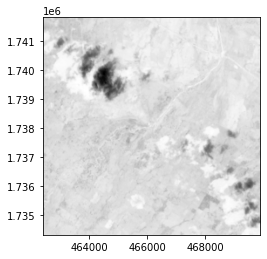

In [29]:
# Show just the infrared band(#4) using the gray color map
show((raster, 4), cmap="Greys")

## Map algebra with rasterio

In [33]:
dem = rasterio.open('/arcgis/home/usdem10k.tiff')
dem_data = dem.read(1)
dem_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [31]:
import matplotlib.pyplot as plt

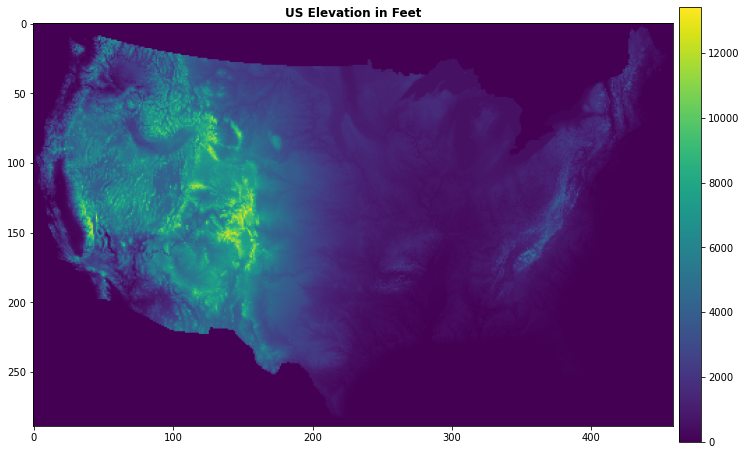

In [34]:
# Set up a matplotlib figure for DEM display
fig, ax = plt.subplots(figsize=(12,8))
# Set up DEM plot with specified data source and title
demplot = show(dem, ax=ax, title='US Elevation in Feet')
cbar = fig.colorbar(ax.imshow(dem_data), fraction=0.035, pad=0.01)
plt.show()

In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep


ModuleNotFoundError: No module named 'seaborn'